In [8]:
# read txt document of entry points
# also iterate over all tif files (adult 3D mask images) in the same path and perform analysis 
# all analysis except column analysis 

In [14]:
#  input and save paths
data_path = '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/output/stable_9_Nov/'
subtype = 'B'
start_age = 37 # not used here
stab_limit = 9 #put limit 

In [15]:
cols_names = ['0,0', '0,1', '1,1', '1,0', 
              '0,-1', '-1,-1', '-1,0', 
              '0,2','0,-2',
              '1,2', '1,3', '1,4',
              '1,-1', '1,-2', '1,-3', '1,-4',
              '2,0', '2,1', '2,2', '2,3', '2,4', 
              '2,-1', '2,-2', '2,-3', '2,-4',
              '-1,1', '-1,2', '-1,3', '-1,4',
              '-1,-2', '-1,-3', '-1,-4',
              '-2,0', '-2,1', '-2,2', '-2,3', '-2,4', 
              '-2,-1', '-2,-2', '-2,-3', '-2,-4']

cols_px_vals = {col:i+1 for i, col in enumerate(cols_names)}

In [16]:
import os
import utils.analysis as analysis
import utils.datautils as datautils
import matplotlib.pyplot as plt
import tifffile as tif
import numpy as np
import re
from tqdm import tqdm
import pandas as pd
import math
from read_roi import read_roi_zip as col_zip
from scipy import ndimage, spatial

In [17]:
# getting list of folders in data_path, where each folder has files for one neuron
N_folders = [name for name in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, name))]
N_folders = [f for f in N_folders if '_P' in f]
N_folders = sorted(N_folders)
N_folders

['211011_P37_N1', '211107_P36_N1']

In [13]:
n_file = N_folders[0]
start_im = re.search('P(.*)_N', n_file)
start_im = float(start_im.group(1))
start_ana = int((start_age - start_im)/0.25)
files_list = datautils.get_file_names(data_path+n_file, group_by='', 
                                    order=True, nested_files=False, 
                                    criteria='')
neu_path = [f for f in files_list if 'clahe' in f.lower()][0]
neuron = tif.imread(neu_path)
mask_path = [f for f in files_list if 'mask' in f.lower()][0]
mask = tif.imread(mask_path)
neuron[mask==0] = 0

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/test_line.tif', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/original_cols_3.png', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/original_cols_2.png', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/original_cols_10.png', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/mywarpedgrid_3.png']


In [18]:
lifetimes = analysis.cal_lifetimes(neuron)

100%|██████████| 84/84 [00:02<00:00, 38.21it/s]


(array([6.77128061e+08, 3.21419200e+06, 1.62894700e+06, 1.06829600e+06,
        8.05397000e+05, 6.48008000e+05, 5.38697000e+05, 4.62957000e+05,
        4.07968000e+05, 3.65929000e+05, 3.34147000e+05, 3.07728000e+05,
        2.86308000e+05, 2.67997000e+05, 2.53346000e+05, 2.38253000e+05,
        2.25847000e+05, 2.14260000e+05, 2.04232000e+05, 1.95587000e+05,
        1.87473000e+05, 1.78476000e+05, 1.71373000e+05, 1.64254000e+05,
        1.57887000e+05, 1.51866000e+05, 1.46367000e+05, 1.40970000e+05,
        1.36635000e+05, 0.00000000e+00, 1.32370000e+05, 1.29000000e+05,
        1.24557000e+05, 1.21561000e+05, 1.17518000e+05, 1.12796000e+05,
        1.08348000e+05, 1.06021000e+05, 1.01599000e+05, 9.81340000e+04,
        9.49020000e+04, 9.13740000e+04, 8.88050000e+04, 8.60190000e+04,
        8.32660000e+04, 8.04890000e+04, 7.63860000e+04, 7.32060000e+04,
        7.08000000e+04, 6.86760000e+04, 6.62090000e+04, 6.45940000e+04,
        6.27400000e+04, 6.01840000e+04, 5.78790000e+04, 5.490500

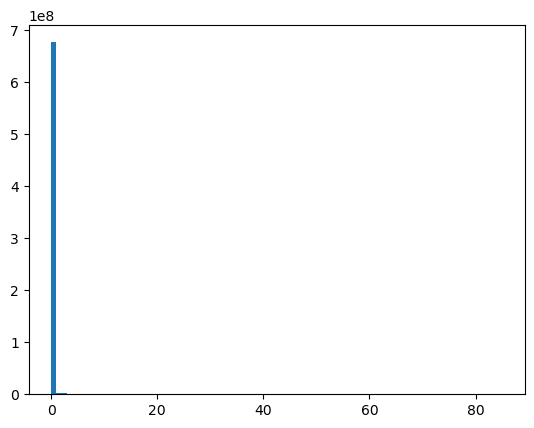

In [20]:
plt.hist(lifetimes.ravel(), bins=88)

(array([9962., 6549., 6713., 4817., 5279., 4162., 3390., 4291., 3343.,
        4241., 3041., 3212., 3665., 2673., 2325., 3937., 2854., 2335.,
        2396., 3013., 2047., 1944., 2184., 2055., 1078.,  622., 1035.,
        1885., 2226., 1921.,  942., 2511., 1634.,  862., 1929.,  939.,
        1285.,  938., 1569., 1931., 1377.,  545.,  463.,  550.,  198.,
         195.,  498.,  424.,  839.,  179.,  563., 1212., 1326.,  294.,
        1100.,  440.,   47.,   33.,  286.,  147.,  239.,   56.,  538.,
         447.,   73.,  183.,  123.,  172.,   49.,   97.,   94.,  368.,
         111.,  101.,  233.,  157.,  252.,  500., 1104.]),
 array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
        18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
        

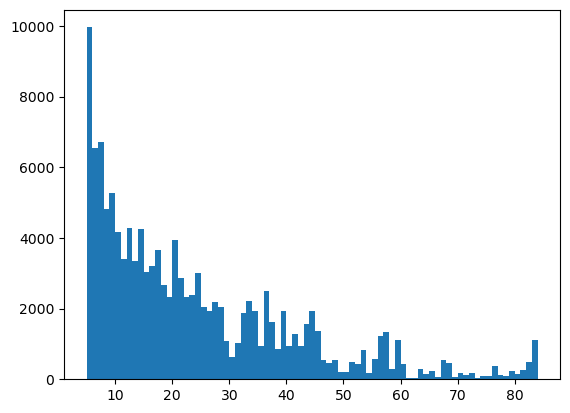

In [31]:
data = lifetimes[-1][(lifetimes[-1]>4) & (lifetimes[-1]<85)]
plt.hist(data, bins=data.max()-data.min())

In [6]:
def get_cols_labeled_neuron(n_file, cols_px_vals):
    start_im = re.search('P(.*)_N', n_file)
    start_im = float(start_im.group(1))
    start_ana = int((start_age - start_im)/0.25)
    files_list = datautils.get_file_names(data_path+n_file, group_by='', 
                                        order=True, nested_files=False, 
                                        criteria='')
    neu_path = [f for f in files_list if 'clahe' in f.lower()][0]
    neuron = tif.imread(neu_path)
    mask_path = [f for f in files_list if 'mask' in f.lower()][0]
    mask = tif.imread(mask_path)
    neuron[mask==0] = 0

    # in case you want to crop the image to certain timeponit-start 
    neuron = neuron[start_ana:] #remove timepoints before start_ana from the 4D image array

    if stab_limit > 1:
        lifetimes = analysis.cal_lifetimes(neuron, save=False)
        neuron = lifetimes.copy()
        neuron[neuron<stab_limit] = 0
        trans_px = lifetimes.copy()
        trans_px[trans_px>=stab_limit] = 0
        trans_px[trans_px != 0] = 1

    # openning the cols_zip file
    cols_path = [f for f in files_list if 'colrois' in f.lower()][0]
    Cols = col_zip(cols_path)

    # get columns centroids (only three are needed but the code is simpler this way)
    cols_centroids = {}
    for col, val in Cols.items():
        if val['type'] == 'oval':
                x0 = val['left']+int(val['width']/2); a = int(val['width']/2)  # x center, half width                                       
                y0 = val['top']+int(val['height']/2); b = int(val['height']/2)  # y center, half height  
                cols_centroids[col] = (y0,x0,a,b) 
    
    #[N,2] array of centroids of all the columns
    cols_centroids_arr = np.array([(i[0],i[1]) for i in cols_centroids.values()])
    cols_names = list(cols_centroids.keys())
    # cols_px_vals = {col:i+1 for i, col in enumerate(cols_centroids.keys())}

    # get the mask of each col based on distances from centroids 
    neu_PC = np.argwhere(np.ones_like(neuron[0,0])) #getting a point cloud of all the possible px in 2D [Y,X] array
    cols_masks = np.zeros_like(neuron[0,0])
    for px in tqdm(neu_PC):
        dist, ind = spatial.KDTree(cols_centroids_arr).query(px)
        col = cols_names[ind]
        cols_masks[px[0],px[1]] = cols_px_vals[col]
    
    mask_4D = np.broadcast_to(cols_masks, neuron.shape)
    col_labeled_neuron = neuron.copy()
    col_labeled_neuron[col_labeled_neuron!=0] = 1
    col_labeled_neuron = col_labeled_neuron * mask_4D
    
    # saving the result labeled image
    col_labeled_neuron = col_labeled_neuron.astype('uint8')
    name = save_path+n_file+'_stable'+str(stab_limit)+'_s'+subtype+'_cols_labeled.tif'
    tif.imwrite(name, col_labeled_neuron, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10, 'axes':'TZYX'})

    # option for saving the mask
    name = save_path+n_file+'_stable'+str(stab_limit)+'_s'+subtype+'_cols_mask.tif'
    tif.imwrite(name, cols_masks, imagej=True, resolution=(1./0.076, 1./0.076),
                metadata={'spacing': 0.4, 'unit': 'um', 'finterval': 1/10, 'axes':'YX'})

    return col_labeled_neuron, cols_masks

def calc_col_occupancy(n_file, cols_px_vals):
    col_labeled_neuron, cols_masks = get_cols_labeled_neuron(n_file, cols_px_vals)
    col_occ_df_cols = list(cols_px_vals.keys())
    col_occ_df_cols = col_occ_df_cols.insert(0,'timepoint')
    col_occ_df = pd.DataFrame(columns=col_occ_df_cols)
    for i, frame in enumerate(col_labeled_neuron):
        t = start_age+i*0.25
        result_line = {'timepoint':t}
        for col, val in cols_px_vals.items():
            result_line[col] = len(frame[frame == val])
        col_occ_df = col_occ_df.append(result_line, ignore_index=True)
    col_occ_df = col_occ_df.loc[:,col_occ_df.sum()!=0]
    col_occ_df.to_csv(save_path+n_file+'_stable'+str(stab_limit)+'_s'+subtype+'_cols_occupanies.csv')
    return col_occ_df

In [7]:
for n_file in tqdm(N_folders):
    col_occ_df = calc_col_occupancy(n_file, cols_px_vals)

  0%|          | 0/2 [00:00<?, ?it/s]

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/test_line.tif', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/original_cols_3.png', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/original_cols_2.png', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/original_cols_10.png', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211011_P37_N1/mywarpedgrid_3.png']


 50%|█████     | 1/2 [00:18<00:18, 18.42s/it]

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211107_P36_N1/211107_P36_N1_Z30.70_clahe.tif', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211107_P36_N1/211107_P36_N1_Z30.70_5D.tif', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211107_P36_N1/211107_P36_N1_R265_mask1.tif', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211107_P36_N1/211107_P36_N1_R265_Z30.70_5D.tif', '/home/tli_project/Desktop/Data/T4/neurons/SubtypeB/211107_P36_N1/211107_P36_N1_R265_ColRois.zip']


100%|██████████| 2/2 [00:34<00:00, 17.45s/it]


In [ ]:
import re
import numpy as np
import tifffile as tif
from scipy import spatial
from tqdm import tqdm
from multiprocessing import Pool

def compute_mask_for_pixel(pixel, cols_centroids_arr, cols_names, cols_px_vals):
    dist, ind = spatial.KDTree(cols_centroids_arr).query(pixel)
    col = cols_names[ind]
    return cols_px_vals[col]

def get_cols_labeled_neuron(n_file, cols_px_vals):
    # load necessary files
    files_list = datautils.get_file_names(data_path+n_file, group_by='', 
                                        order=True, nested_files=False, 
                                        criteria='')
    neu_path = [f for f in files_list if 'clahe' in f.lower()][0]
    neuron = tif.imread(neu_path)
    mask_path = [f for f in files_list if 'mask' in f.lower()][0]
    mask = tif.imread(mask_path)
    neuron[mask==0] = 0
    
    # crop image to start_ana timepoint
    start_im = re.search('P(.*)_N', n_file)
    start_im = float(start_im.group(1))
    start_ana = int((start_age - start_im)/0.25)
    neuron = neuron[start_ana:]
    
    # apply stability limit and get transition pixels
    if stab_limit > 1:
        lifetimes = analysis.cal_lifetimes(neuron, save=False)
        neuron = lifetimes.copy()
        neuron[neuron<stab_limit] = 0
        trans_px = lifetimes.copy()
        trans_px[trans_px>=stab_limit] = 0
        trans_px[trans_px != 0] = 1
    
    # load column information
    cols_path = [f for f in files_list if 'colrois' in f.lower()][0]
    Cols = col_zip(cols_path)
    cols_centroids = {}
    for col, val in Cols.items():
        if val['type'] == 'oval':
            x0 = val['left']+int(val['width']/2); a = int(val['width']/2)  # x center, half width                                       
            y0 = val['top']+int(val['height']/2); b = int(val['height']/2)  # y center, half height  
            cols_centroids[col] = (y0,x0,a,b) 
    
    # get centroids and names of all the columns
    cols_centroids_arr = np.array([(i[0],i[1]) for i in cols_centroids.values()])
    cols_names = list(cols_centroids.keys())

    # compute masks for each pixel in the image
    with Pool() as p:
        mask_arr = np.array(list(tqdm(p.imap(
            lambda pixel: compute_mask_for_pixel(pixel, cols_centroids_arr, cols_names, cols_px_vals), 
            np



